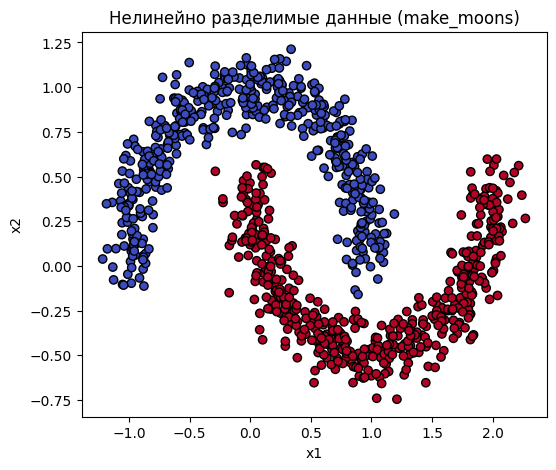

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

# Генерация нелинейно разделимых данных (например, "полумесяцы")
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Визуализация
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Нелинейно разделимые данные (make_moons)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Разделение на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # (N, 1)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

Создание MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = MLP()
print(model)

MLP(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


Обучение модели

In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)

EPOCHS = 1000
losses = []

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Эпоха {epoch+1}/{EPOCHS}, Потери: {loss.item():.4f}")

Эпоха 100/1000, Потери: 0.3826
Эпоха 200/1000, Потери: 0.2998
Эпоха 300/1000, Потери: 0.2705
Эпоха 400/1000, Потери: 0.2411
Эпоха 500/1000, Потери: 0.2297
Эпоха 600/1000, Потери: 0.2245
Эпоха 700/1000, Потери: 0.2216
Эпоха 800/1000, Потери: 0.2198
Эпоха 900/1000, Потери: 0.2188
Эпоха 1000/1000, Потери: 0.2181


График потерь

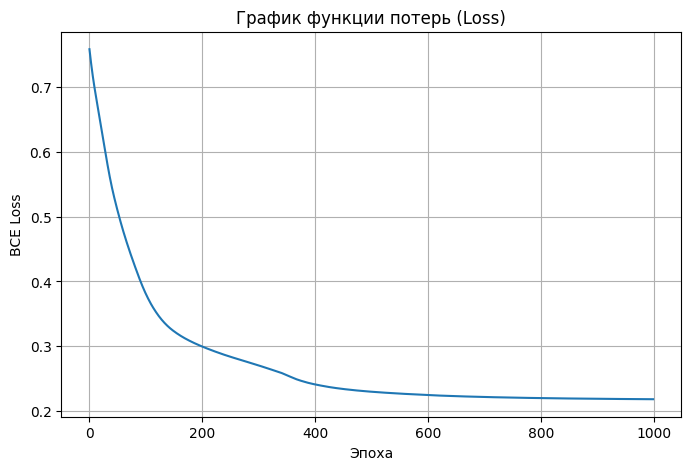

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('График функции потерь (Loss)')
plt.xlabel('Эпоха')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

Оценка точности на тесте

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_class = (y_pred_test > 0.5).float()
    accuracy = accuracy_score(y_test, y_pred_class.numpy().flatten())

print(f"Точность на тестовой выборке: {accuracy:.4f} ({accuracy*100:.2f}%)")

Точность на тестовой выборке: 0.9150 (91.50%)


Решение XOR

In [ ]:
# Данные XOR
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=np.float32)
y_xor = np.array([[0], [1], [1], [0]], dtype=np.float32)

X_xor_t = torch.tensor(X_xor)
y_xor_t = torch.tensor(y_xor)

# Обучим ту же модель на XOR
model_xor = MLP()
optimizer_xor = optim.Adam(model_xor.parameters(), lr=0.01)
criterion_xor = nn.BCELoss()

losses_xor = []
for epoch in range(5000):
    optimizer_xor.zero_grad()
    out = model_xor(X_xor_t)
    loss = criterion_xor(out, y_xor_t)
    loss.backward()
    optimizer_xor.step()
    losses_xor.append(loss.item())

# Оценка
with torch.no_grad():
    pred_xor = (model_xor(X_xor_t) > 0.5).float()
    acc_xor = (pred_xor.numpy() == y_xor).mean()
    print("\nРезультаты на XOR:")
    print("Предсказания:", pred_xor.flatten().numpy())
    print("Истинные:", y_xor.flatten())
    print(f"Точность: {acc_xor:.2f}")


Результаты на XOR:
Предсказания: [0. 1. 1. 0.]
Истинные: [0. 1. 1. 0.]
Точность: 1.00
